In [63]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_colwidth = 400

%matplotlib inline

In [64]:
data_directory = os.path.join('..','data','')
csv_path = os.path.join(data_directory, 'twitter_hate_speech.csv')
df_orig = pd.read_csv(csv_path, engine = 'python', delimiter = ',')

In [65]:
df_orig.columns = ['id', 'golden','state', 'trusted_judgements','last_judgment','is_hate_speech','confidence',
                   'created','orig_golden','orig_last_judgement','orig_trusted_judgements','orig_id','orig_state',
                   'updated','orig_is_hate_speech','is_hate_speech_gold','reason','confidence2','id2','text']

# Drop columns

In [66]:
df = df_orig.dropna(thresh = 68, axis = 'columns')
df = df.set_index('id')

In [67]:
df.head()

,golden,state,trusted_judgements,last_judgment,is_hate_speech,confidence,id2,text
id,,,,,,,,
853718217,True,golden,86,NaN,The tweet uses offensive language but not hate speech,0.6013,1.666196e+09,Warning: penny boards will make you a faggot
853718218,True,golden,92,NaN,The tweet contains hate speech,0.7227,4.295121e+08,Fuck dykes
853718219,True,golden,86,NaN,The tweet contains hate speech,0.5229,3.956238e+08,@sizzurp__ @ILIKECATS74 @yoPapi_chulo @brandonernandez @bootyacid at least i dont look like jefree starr faggot
853718220,True,golden,98,NaN,The tweet contains hate speech,0.5184,4.975147e+08,"""@jayswaggkillah: ""@JacklynAnnn: @jayswaggkillah Is a fag"" jackie jealous"" Neeeee"
853718221,True,golden,88,NaN,The tweet uses offensive language but not hate speech,0.5185,5.889236e+08,@Zhugstubble You heard me bitch but any way I'm back th texas so wtf u talking about bitch ass nigga


Confidence appears to have been a meaningful metric for only a third of the tweets in the dataset.

# Recode hate speech classifications

In [68]:
df = df[['text','is_hate_speech']]
categories = df.is_hate_speech.unique()
df['is_hate_speech'] = df['is_hate_speech'].replace(categories, [1,2,0])

# Things to clean up
- twitter handles
- emoticons
- urls
- newlines
- hashtags
- duplicate tweets

In [69]:
df.head()

,text,is_hate_speech
id,,
853718217,Warning: penny boards will make you a faggot,1
853718218,Fuck dykes,2
853718219,@sizzurp__ @ILIKECATS74 @yoPapi_chulo @brandonernandez @bootyacid at least i dont look like jefree starr faggot,2
853718220,"""@jayswaggkillah: ""@JacklynAnnn: @jayswaggkillah Is a fag"" jackie jealous"" Neeeee",2
853718221,@Zhugstubble You heard me bitch but any way I'm back th texas so wtf u talking about bitch ass nigga,1


# Generate giant text file with all tweets

In [71]:
import re

replace_user = lambda tweet: re.sub(r'(@\w+\s*)', r'TWITTER_HANDLE ', tweet)
clean_tweet = lambda tweet: re.sub(r'#|&|\(|\)|\"|(https?://\S*)|(�\S*\d*)|(128\d{3})|(_*UNDEF)',
                      ' ', tweet)

In [72]:
import spacy
nlp = spacy.load('en')

In [73]:
def lemmatize(tweet):
    x = str()
    for token in nlp(tweet):
        x = ' '.join([x,token.lemma_])
    return x[1:]

In [74]:
df_clean = df.copy()
df_clean['text'] = df_clean['text'].apply(clean_tweet)
df_clean['text'] = df_clean['text'].apply(replace_user)
df_clean['text'] = df_clean['text'].apply(lemmatize)
df_clean.iloc[40:50,]

,text,is_hate_speech
id,,
853718257,"sit alone watch white chicks , no pant , fuzzy blanket , tea || turn up",0
853718258,-PRON- want to go to a haunt house maybe get possesed y'know just to see if ghost be real ; ;,0
853718259,$ 10 buck the browns get johnny ! ; ; ;,0
853718260,-PRON- be with a bitch with a mustash for a year and a half ? wtf be wrong itch -PRON-,1
853718261,"rt twitter_handle : huge ass , small waist amp ; okay face amp ; bitch really think -PRON- famous",1
853718262,bobby flay in this bitch,1
853718263,-PRON- be never gon na be ok with -PRON- nigga around alot of bitch while with -PRON- boy . cause -PRON- be once that female -PRON- boy put -PRON- on ! !,1
853718264,where the bad bitch at ? lol twitter_handle,1
853718265,rt twitter_handle : -PRON- just can not help but to hate -PRON- . even though -PRON- never intentionally do anything to -PRON- -PRON- be still a cunt . girllogic,1


# Duplicate tweets need to be addressed

In [14]:
df_clean.text.value_counts()

twitter_handle shut up nigger                                                                                                                                            33
amid economic recovery , school district desperate for bus drivers : when unemployment be high , school district ...                                                     27
[ drum and bass ] btsm x lektrique - religion   muzzy remix   -                                                                                                          21
1 , 2 , 3 , 1 , 2 , 3 ... 4 how many nigger be in -PRON- store                                                                                                           21
123 123 4 how many nigger be in -PRON- store                                                                                                                             14
1223 4 how many nigger be in -PRON- store       vine by funny vines : twitter_handle : 1223 4 how many nigger be in -PRON- ...              

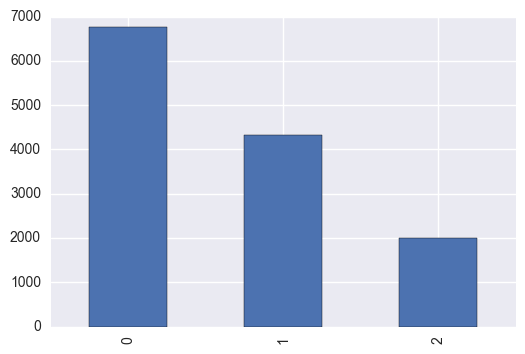

In [75]:
df_clean = df_clean.drop_duplicates(subset = 'text')
df_clean.is_hate_speech.value_counts().plot(kind = 'bar')

In [16]:
with open('../data/corpus_cnn.txt','wt') as file_out:
    for tweet in df_clean.text:
        file_out.write(tweet + '\n')

# Processing into learnable form

In [17]:
np.random.seed(1701)

from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Activation, Embedding, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.models import Sequential
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [98]:
import pickle as pkl

with open('../data/dataframe_clean_old', 'wb') as file_out:
    pkl.dump(df_clean, file_out)

In [99]:
# create 100-dimensional vector embeddings for words that appear in the corpus at least 2 times
embedding_dimension = 100
model = Word2Vec([tweet.split() for tweet in df_clean.text], min_count = 2, size = embedding_dimension,
                 window = 10, sg = 1)
max_vocab_size = len(model.wv.vocab)
print('word2vec vocabulary size:', max_vocab_size)

# tokenize each tweet in the corpus. this will be useful for embedding each tweet as an index sequence vector
tokenizer = Tokenizer(num_words = max_vocab_size)
tokenizer.fit_on_texts(df_clean.text)
print('tokenizer vocabulary size:', tokenizer.num_words)

word2vec vocabulary size: 6250
tokenizer vocabulary size: 6250


In [101]:
# check quality of word vector embedding
model.most_similar(['trump'])

[('muslim', 0.9578368067741394),
 ('religion', 0.9420522451400757),
 ('islam', 0.9342803955078125),
 ('donald', 0.9316298365592957),
 ('anti', 0.9312945604324341),
 ('hillary', 0.9189521670341492),
 ('term', 0.9173989295959473),
 ('against', 0.9166361093521118),
 ('america', 0.9100169539451599),
 ('isis', 0.9075685739517212)]

In [102]:
# create embedding matrix where each row corresponds to a vector for a word. the row index is determined by tokenizer.
embedding_matrix = np.zeros([max_vocab_size + 1, embedding_dimension])
for word, index in tokenizer.word_index.items():
    if word in model.wv.vocab:
        vector = model[word]
        embedding_matrix[index,:] = vector

print('number of words without vector embeddings:', sum(embedding_matrix.sum(axis = 1) == 0))

number of words without vector embeddings: 159


In [111]:
with open('../data/embedding_matrix_old', 'wb') as file_out:
    pkl.dump(embedding_matrix, file_out)

In [103]:
# convert tweets to index sequence vectors
X = tokenizer.texts_to_sequences(df_clean.text)
max_sequence_length = np.array([len(sequence) for sequence in X]).max()
print('The tweet with the longest sequence has {} indices.'.format(max_sequence_length))

# pad index sequence vectors so they all have same length and X is rectangular
X = pad_sequences(X, maxlen = max_sequence_length, padding = 'post', truncating = 'post')
print('Matrix X has shape:', X.shape)

# create label matrix y
y = to_categorical(df_clean.is_hate_speech)
print('Labels y has shape:', y.shape)

The tweet with the longest sequence has 35 indices.
Matrix X has shape: (13111, 35)
Labels y has shape: (13111, 3)


In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1)

# Build CNN

In [112]:
cnn = Sequential()
cnn.add(Embedding(embedding_matrix.shape[0],
                 embedding_matrix.shape[1],
                 weights = [embedding_matrix],
                 input_shape = (X.shape[1],)))
#cnn.add(Flatten())
cnn.add(Conv1D(20, 5, padding = 'valid', strides = 1, activation = 'relu'))
cnn.add(Dropout(0.3))
cnn.add(GlobalMaxPooling1D())
#cnn.add(Conv1D(20, 3, padding = 'valid', strides = 1, activation = 'relu'))
#cnn.add(GlobalMaxPooling1D())
#cnn.add(Dense(20, activation = 'relu'))
cnn.add(Dropout(0.3))
#cnn.add(Dense(50, activation = 'relu'))
#cnn.add(Dropout(0.1))
#cnn.add(Dense(10, activation = 'relu'))
cnn.add(Dense(3, activation = 'softmax'))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [113]:
early_stopping = EarlyStopping(patience = 2, monitor = 'val_acc')
history = cnn.fit(X_train, y_train, validation_split = 0.3, epochs = 30, callbacks = [early_stopping],
                  batch_size = 200, verbose = False)

training accuracy: 0.935388451849
validation accuracy: 0.819898331304


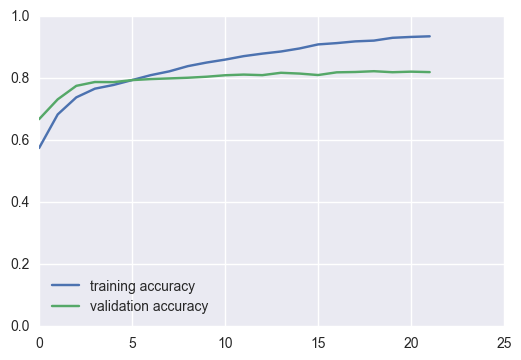

In [114]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(train_acc, label = 'training accuracy')
plt.plot(val_acc, label = 'validation accuracy')
plt.legend(loc = 0)
plt.ylim(0,1)
print('training accuracy:', train_acc[-1])
print('validation accuracy:', val_acc[-1])

In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score

def proba_to_prediction(predict_probas):
    predictions = np.array([np.argmax(row) for row in predict_probas])
    return predictions

def evaluate(y, y_pred):
    print('accuracy:', accuracy_score(y, y_pred))
    print('confusion matrix:\n', confusion_matrix(y, y_pred))
    
def flatten(y):
    y_cat = y.copy()
    y_cat[:,0] = 0
    y_cat[:,2] = y_cat[:,2] * 2
    y_cat = y_cat.sum(axis = 1)
    return y_cat

In [109]:
predict_probas = cnn.predict(X_test)
#y_orig = df_clean.is_hate_speech
y_pred = proba_to_prediction(predict_probas).reshape(-1)
y_test_flatten = flatten(y_test).reshape(-1)
evaluate(y_test_flatten, y_pred)

accuracy: 0.821809862735
confusion matrix:
 [[1934   74   14]
 [ 117 1020  170]
 [  59  267  279]]


# What if we collapse offensive and hate speech into a single category

In [215]:
y_binary = (y_test_flatten == 1) | (y_test_flatten == 2)
y_pred_binary = (y_pred == 1) | (y_pred == 2)
evaluate(y_binary, y_pred_binary)

accuracy: 0.933663743805
confusion matrix:
 [[1313   53]
 [ 121 1136]]


In [216]:
def tweet_rater(tweet):
    tweet = clean_tweet(tweet)
    tweet_tokens = [token.lemma_ for token in nlp(tweet)]
    tweet = ' '.join(tweet_tokens)
    print(tweet)
    x_vect = tokenizer.texts_to_sequences([tweet])
    x_vect = pad_sequences(x_vect, maxlen = max_sequence_length, padding = 'post', truncating = 'post')
    probas = cnn.predict(x_vect)[0]
    print(probas)
    rating = np.argmax(probas)
    if rating == 0:
        print('I\'m {:2.4}% sure that\'s not offensive.'.format(probas[0]*100))
    elif rating == 1:
        print('I\'m {:2.4}% sure that\'s offensive.'.format(probas[1]*100))
    else:
        print('I\'m {:2.4}% sure that\'s hate speech.'.format(probas[2]*100))

In [236]:
tweet_rater('you\'re an idiot')

-PRON- be an idiot
[ 0.29044449  0.3213101   0.38824537]
I'm 38.82% sure that's hate speech.


In [580]:
df = df.reindex(df_clean.index)

In [223]:
y_all_pred = cnn.predict(X)
y_all_pred = proba_to_prediction(y_all_pred)
y_all = df_clean.is_hate_speech

# Non-offensive speech classified as offensive

In [230]:
df_orig = df.reindex(df_clean.index)

In [231]:
df_orig[(y_all == 0) & (y_all_pred == 1)]

,text,is_hate_speech
id,,
853719614,"@SeanTheTerrible: watch the fake upscale, high class girls call you a ""broke ashy boy"" for this...smh _�㢉�_�ۢ",0
853719632,"@precious_sneed lmao deadass, nah them 9's be ashy af too_�㢉�__ people at my school shits be damn near see through",0
853719636,@ashy_adree Ayyyy I saw Kevin last night .his still ugly_�㢉�_�_,0
853719637,@Ashy_Boss I pay rent to tho smh that's just my mothers bills _�㢉�_�,0
853719640,"I know you don't believe this you just typed""@Royal_Anza: Tsek na madry Ashy nudes akho https://t.co/jRpNNwTFlS""",0
853719648,@She_Me_Her_We stop stunting on us rent payers!,0
853719677,I'm just tryna feel you out \nI don't wanna scare you away \nI kinda wanna test you out\nBut I don't wanna know your name \n*_��_̤_�_�___*,0
853719688,@SketchpadTheGr8 posh bastard,0
853719692,@MarissaWolff_ I hope so too cuz Kurt Sutter's recent show he made after Sons was The Bastard Executioner &amp; it was horrible,0


# Non-offensive classified as hate speech

In [235]:
df_orig[(y_all == 0) & (y_all_pred == 2)]

,text,is_hate_speech
id,,
853718254,@LastProtestants @stomponato @delschilling You're an idiot.,0
853719589,"So, we in America must be aware of what our enemy's saying and doing and take measures to stop the threat at the... https://t.co/fc8O9VyT3d",0
853719776,Blacks can't be racist. We welcomed racist murderous land thieves to our mother land and what did they do? They invented racism and races.,0
853719906,"Chink, Malik and Dias always Playing_�㢉�_�__�㢉�_�_",0
853719960,Some temptations are harder to fight than others,0
853720320,Yet we don'o have acceptancebfor 'em Call each other faggots Behind the keyl of a message.board,0
853720370,@SNPfail @BigKim7 @BigGfaetheBigG @KatePotts11 @GrinBins have you gone to get your fags,0
853720389,Fags_�㢉�_�__�㢉�_�__�㢉�_�__�㢉�_� https://t.co/EzaAxTfPM4,0
853720585,Homo Sapiens by Bradley Williamson (@becomingthewind) https://t.co/ICqdE3z9V8 #Poetry #iartg #ian1 #amwriting,0


# Offensive speech classified as non-offensive

In [232]:
df_orig[(y_all == 1) & (y_all_pred == 0)]

,text,is_hate_speech
id,,
853718266,"RT @HBCUfessions: You females overlook us geeks. When I take these glasses off, I'm no longer Clark Kent. I go superman in that pussy. - FA&#8230;",1
853718269,"RT @JoeBudden: Young, attractive, successful, supportive, faithful man w his own everything..u think bringing solely pussy to the table is &#8230;",1
853718277,why is this niggah still tweetn tf !!!!,1
853719611,"If you see me today...1:I'm not matching (intentionally). 2:I'm not sweating, it's baby oil (ion wanna look like you ashy bastards). Thanks_�㢉�_�",1
853719657,If you ain't for letting a chick stack all her money while u break yo back to pay the bills you\n1. Broke Boi\n2. Call center worker\n3. Ashy,1
853719687,Thank you for follow @stranglewank and congratulations on having you two hobbies as your name. Is bastard clever,1
853719714,"@CNN @JebBush @HillaryClinton She can bend over and grab her ankles, Bill taught her well.",1
853719758,@kflo88081 whenever hurricane Katrina came by we picked up a lot of blacks from Louisiana. There is section 8 apts now.,1
853719768,Blacks who try to act like white people are the worst,1


# Hate speech classified as non-offensive

In [233]:
df_orig[(y_all == 2) & (y_all_pred == 0)]

,text,is_hate_speech
id,,
853719594,"Leak: 12 ISIS Terrorists ""Vetted"" &amp; Let into America - Screening Process Not Good Enough! https://t.co/E3mt7jBPnx..|v.V",2
853719773,@TheEricCarter @JaredWyand @cristinalaila1 YES White America is a LOT better than Muslim S Arabia. Blacks are way more racist than whites.,2
853719919,i love chink lmfao,2
853719976,"@glen76stephens how can I forget about you,ya post the Chinks,eggs,chips and beans bollocks ye",2
853719984,how do chinks eat rice with chopsticks?,2
853719985,They goin sale America to the chinks before they give a black man such power _��_�۝_�㢉�___��̻_,2
853720240,"@HillaryClinton you're right however, when two dykes adopt a black kid and call it moon. that's a complex waiting to happen.",2
853720405,What's with basketball players wearing yoga pants under their shorts? Fags,2
853720554,"@polandmary21 @NancyPelosi @POTUS I am not a racist, I just don't approve of a homo, treasonous, fucktard embarrassing America",2


# Correctly identified hate speech

In [234]:
df_orig[(y_all == 2) & (y_all_pred == 2)]

,text,is_hate_speech
id,,
853718219,@sizzurp__ @ILIKECATS74 @yoPapi_chulo @brandonernandez @bootyacid at least i dont look like jefree starr faggot,2
853718220,"""@jayswaggkillah: ""@JacklynAnnn: @jayswaggkillah Is a fag"" jackie jealous"" Neeeee",2
853718223,RT @ivanrabago_: @_WhitePonyJr_ looking like faggots?,2
853718228,"@AndreBerto word is you use roids, stupid hypocrite lying faggot.",2
853718229,I hate faggots like you,2
853718230,@MoriTaheripour shut up nigger whore! Hope u get raped by one of those animals. Might change your tune.,2
853718233,Good night fags and fagettes (that's the female version of fags like fag-ettes to make it female) I hate you all.,2
853718235,RT @nerdkiller669: @ShinSnipes no you're a nigger,2
853718237,@OxbloodStomper @PalePixie88 @SlaveCatcher88 what's your problem? Don't u know Jews control niggers? Read a book or two.,2


# Correctly identified offensive speech

In [237]:
df_orig[(y_all == 1) & (y_all_pred == 1)]

,text,is_hate_speech
id,,
853718217,Warning: penny boards will make you a faggot,1
853718221,@Zhugstubble You heard me bitch but any way I'm back th texas so wtf u talking about bitch ass nigga,1
853718225,"@Stonisnipezz I know. It was a joke, faggot.",1
853718226,I'm tired of people saying I look like my brother &amp; calling me Deondre' like serious Succ My Ass fag asses,1
853718234,I cant stand no crybaby ass nigga. If you gonna act like a bitch I will leave yo ass after I instavideo yo stupid lookin ass,1
853718236,"""I'll fuck you til you love me faggot"" - Mike Tyson",1
853718260,I was with a bitch with a mustash for a year and a half? Wtf is wrong itch me,1
853718261,"RT @skythedon: Huge ass, small waist &amp; okay face &amp; bitches really think they famous",1
853718262,Bobby flay in this bitch,1


# Correctly identified non-offensive speech

In [238]:
df_orig[(y_all == 0) & (y_all_pred == 0)]

,text,is_hate_speech
id,,
853718239,RT @Fact: Some species of birds have been known to hold funerals for their deceased.,0
853718240,"I remember Draft prom night, my dress wouldn't zip up and I was bawling my eyes out and screaming I didn't want to go... So funny. Haha.",0
853718241,Damn Eli. That's just ruff. I'm not even gonna trash talk that one. Get your game together Eli. You're a good QB. Stop with the TO's,0
853718242,"Also, Happy Armistice Day, anachronists!\n\n&#8220;The Hun is either at your throat or at your feet.&#8221; - Churchill",0
853718243,@ExpSelf A friend suggested I dress as a Fairy for a Halloween party we're attending...I'm thinking more Wizardess of course. :),0
853718244,RT @BitchPlsComedy: apparently &#8220;bae&#8221; means &#8220;before anyone else&#8221; i always thought it was a ghetto word for &#8220;babe&#8221;,0
853718245,@RiotSupport so I was suspended for a day because of a random lag spikes that force me to close the client and relog and suspended. GG,0
853718246,#Flyers w/ some moxy! Big comeback again!!! Major penalty killed the Caps.Great game. 5 cases of #tastycakes,0
853718247,pollo&#128523;&#128523;&#128523;,0
